In [1]:
import numpy as np
import scipy.optimize as sp
import pandas as pd

# Read the data

In [2]:
columns = ['p', 'q', 'r', 'score']
score_dist = pd.read_csv("DATA/score-distribution-2.csv", names=columns)

## Reduce p and r size (converting to hours)

In [3]:
# Isolate target variable
score = score_dist['score'].copy()
score

0       0.032182
1       0.046431
2       0.040886
3       0.039235
4       0.040176
          ...   
7163    0.025382
7164    0.024157
7165    0.025708
7166    0.023454
7167    0.023329
Name: score, Length: 7168, dtype: float64

In [4]:
# Isolate features and convert p and r
features = score_dist[['p', 'q', 'r']].copy()
for column in ['p', 'r']:
    features[column] = features[column] / 3600
features.head()

,p,q,r
0,2.209722,32,0.734167
1,5.556944,2,0.856944
2,0.036667,1,0.858889
3,0.010000,4,0.861111
4,2.746389,1,0.866389


# Regression with this variables

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = features
y = score
weights = (features['p'] * features['q'])

In [9]:
reg = LinearRegression()
reg.fit(X, y, weights)

LinearRegression()

In [10]:
reg.coef_

array([ 4.95249061e-04,  2.00516225e-05, -3.98840890e-04])

In [14]:
y_pred = reg.predict(X)
size = y.shape[0]
np.sum(np.absolute(y_pred - y)) / size

0.004099777925588293

## Old method

In [12]:
from polynomials import fit_curve, lin, sqr, cub, qua, qui, sex
sigma = 1.0 / weights
p = features['p']
q = features['q']
r = features['r']
popt, err = fit_curve(lin, p, q, r, score, sigma)
popt, err

(array([ 3.16688936e-02,  4.47173675e-04,  3.10222313e-05, -5.85829108e-04]),
 0.004480199908167914)

The methods are equivalent

## VIF

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,1.328593,p
1,1.287783,q
2,1.216593,r


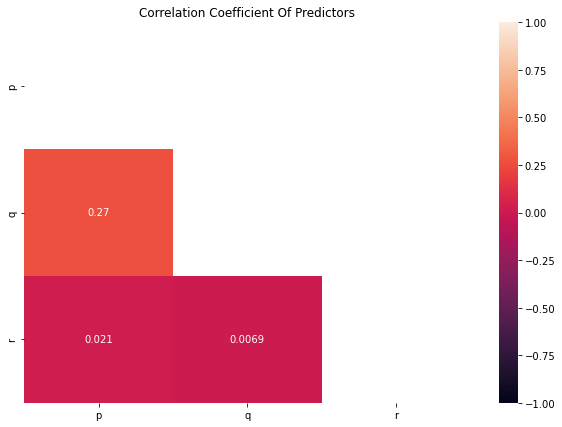

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(features.corr(), dtype=bool))

# generate heatmap
sns.heatmap(features.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

# Data normalization (z-score)

In [ ]:
score_dist_std = score_dist.copy()

# Normalize p, q, r features using the z-score normalization
for column in ['p', 'q', 'r']:
    mu = score_dist_std[column].mean()
    std = score_dist_std[column].std()
    score_dist_std[column] = (score_dist_std[column] - mu) / std
score_dist_std

# Creating the predictors

In [ ]:
# Quadratic predictors
score_dist_std['p2'] = score_dist_std['p']**2
score_dist_std['q2'] = score_dist_std['q']**2
score_dist_std['r2'] = score_dist_std['r']**2
score_dist_std['pq'] = score_dist_std['p']*score_dist_std['q']

In [ ]:
# Cubic predictors
score_dist_std['p3'] = score_dist_std['p']**3
score_dist_std['q3'] = score_dist_std['q']**3
score_dist_std['r3'] = score_dist_std['r']**3
score_dist_std['p2q'] = (score_dist_std['p']**2)*score_dist_std['q']
score_dist_std['pq2'] = score_dist_std['p']*(score_dist_std['q']**2)

In [ ]:
# Quartic predictors
score_dist_std['p4'] = score_dist_std['p']**4
score_dist_std['q4'] = score_dist_std['q']**4
score_dist_std['r4'] = score_dist_std['r']**4
score_dist_std['p3q'] = (score_dist_std['p']**3)*score_dist_std['q']
score_dist_std['p2q2'] = (score_dist_std['p']*score_dist_std['q'])**2
score_dist_std['pq3'] = score_dist_std['p']*(score_dist_std['q']**3)

In [ ]:
# Quintic predictors
score_dist_std['p5'] = score_dist_std['p']**5
score_dist_std['q5'] = score_dist_std['q']**5
score_dist_std['r5'] = score_dist_std['r']**5
score_dist_std['p4q'] = (score_dist_std['p']**4)*score_dist_std['q']
score_dist_std['p3q2'] = (score_dist_std['p']**3)*(score_dist_std['q']**2)
score_dist_std['p2q3'] = (score_dist_std['p']**2)*(score_dist_std['q']**3)
score_dist_std['p4q'] = (score_dist_std['p']**4)*score_dist_std['q']

In [ ]:
# Sextic predictors
score_dist_std['p6'] = score_dist_std['p']**6
score_dist_std['q6'] = score_dist_std['q']**6
score_dist_std['r6'] = score_dist_std['r']**6
score_dist_std['p5q'] = (score_dist_std['p']**5)*score_dist_std['q']
score_dist_std['p4q2'] = (score_dist_std['p']**4)*(score_dist_std['q']**2)
score_dist_std['p3q3'] = (score_dist_std['p']**3)*(score_dist_std['q']**3)
score_dist_std['p2q4'] = (score_dist_std['p']**2)*(score_dist_std['q']**4)
score_dist_std['pq5'] = score_dist_std['p']*(score_dist_std['q']**5)

In [ ]:
score_dist_std

In [ ]:
# Move score column to the end
column_to_move = score_dist_std.pop("score")
score_dist_std.insert(32, "score", column_to_move)
score_dist_std

# Scikit-learn regression

In [ ]:
from sklearn.linear_model import LinearRegression

## Linear model

In [ ]:
X = score_dist_std[['p', 'q', 'r']]
y = score_dist_std['score']
# weights = (score_dist_std['p'] * score_dist_std['q'])

In [ ]:
reg = LinearRegression()
reg.fit(X, y)

In [ ]:
y_predict = reg.predict(X)

In [ ]:
np.sum(np.absolute(y_predict - y))

# Standard method

In [ ]:
from polynomials import fit_curve, lin, sqr, cub, qua, qui, sex

# Compute the weights
weights = 1.0 / (score_dist['p'] * score_dist['q'])
sigma = pd.Series(weights, name='sigma')

p, q, r = score_dist['p'].to_numpy(), score_dist['q'].to_numpy(), score_dist['r'].to_numpy()
score = score_dist['score'].to_numpy()
sample_weights = sigma.to_numpy()

functions = [lin, sqr, cub, qua, qui, sex]

path = 'DATA/'
files = [
    'lin_opt.csv', 'sqr_opt.csv', 'cub_opt.csv',
    'qua_opt.csv', 'qui_opt.csv', 'sex_opt.csv']

for i in range(len(functions)):
    popt, err = fit_curve(functions[i], p, q, r, score, sample_weights)
    opt_info = np.append([err], popt)
    # print(opt_info)
    np.savetxt(path + files[i], opt_info, delimiter=",")